Info:  
Used dataset : https://www.kaggle.com/jessicali9530/celeba-dataset  
Used face detection model is from : https://github.com/opencv/opencv.git

## Part 1. Face Detection

> First of all, we need to import all necessary libraries

In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import os
import sys
import glob

> Let's specify image folder

In [38]:
DATA_FOLDER = "C:/Users/Kate/Documents/datasets/archive/img_align_celeba/img_align_celeba"

> With the following code block you can look through all dataset images or some subset of them

In [39]:
num = 0
# read and show all images
for imag in glob.iglob(f'{DATA_FOLDER}/*.jpg'):
    #print(imag)
    img = cv2.imread(imag)
    if img is None:
        print("An error has occured.")
        sys.exit("Could not read the image.")
    cv2.imshow("Display window",img)  
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    break
    # num += 1
    # if num > 6:
    #    break

> Let's choose an image to use detection model on

In [40]:
work_img_path = DATA_FOLDER + '/000816.jpg'

In [41]:
work_img = cv2.imread(work_img_path)
if work_img is None:
        print("An error has occured.")
        sys.exit("Could not read the image.")
tmp_image = work_img.copy()

> We need to convert it to grayscale for algorithm to be able to work

In [42]:
gray = cv2.cvtColor(work_img, cv2.COLOR_BGR2GRAY)

> Face detection on grayscalre version of an image.
  Then showing (highliting with a rectangular frame) on an original image 
  the area which represents the face in algorithm's opinion 

In [43]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [44]:
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

In [45]:
X = 0
Y = 0
W = 0
H = 0
for (x, y, w, h) in faces:
    X = x
    Y = y
    W = w
    H = h
    cv2.rectangle(tmp_image, (x, y), (x+w, y+h), (255, 0, 0), 2)

In [46]:
cv2.imshow('img', tmp_image)
cv2.waitKey()
cv2.destroyAllWindows()

## Part 2. Crop image and get binary border image

> Creating cropped image

In [47]:
crop_img = work_img[-Y-H-(int)((Y+H)*0.1):Y+H+(int)((Y+H)*0.1), -X-W-(int)((X+W)*0.1):X+W+(int)((X+W)*0.1)]

In [48]:
cv2.imwrite('C:/Users/Kate/Desktop/cropped.jpg', crop_img)

True

In [49]:
cv2.imshow('img', crop_img)
cv2.waitKey()
cv2.destroyAllWindows()

> Edge detector

In [50]:
from __future__ import print_function
import cv2 as cv
import argparse

In [51]:
path_to_cropped = 'C:/Users/Kate/Desktop/cropped.jpg'

In [52]:
max_lowThreshold = 100
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'
ratio = 3
kernel_size = 3

In [53]:
def CannyThreshold(val):
    low_threshold = val
    img_blur = cv.blur(src_gray, (3,3))
    detected_edges = cv.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    cv.imshow(window_name, dst)

In [54]:
src = cv.imread(path_to_cropped)
if src is None:
    print('Could not open or find the image: ', path_to_cropped)
    exit(0)
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
cv.namedWindow(window_name)
cv.createTrackbar(title_trackbar, window_name , 0, max_lowThreshold, CannyThreshold)
th = CannyThreshold(23)
cv.waitKey()
cv.destroyAllWindows()

> Morph growth

In [55]:
work_img = cv2.imread(path_to_cropped)
ret, th = cv2.threshold(src_gray, 0, 255, cv2.THRESH_OTSU)

In [56]:
npKernel = np.uint8(np.zeros((5, 5)))
for i in range(5):
    npKernel[2, i] = 1
    npKernel[i, 2] = 1

In [57]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [58]:
npKernel_dilated = cv2.dilate(th, npKernel)
kernel_dilated = cv2.dilate(th, kernel)

In [59]:
cv2.imshow('img', th)
#cv2.imshow('npKernel Dilated Image', npKernel_dilated)
#cv2.imshow('kernel Dilated Image', kernel_dilated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
dst = cv.GaussianBlur(th,(5,5),cv2.BORDER_DEFAULT)

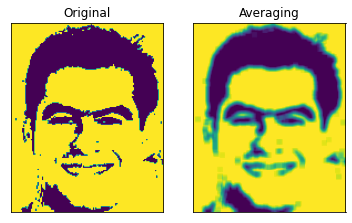

In [61]:

plt.subplot(121),plt.imshow(th),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [62]:
cv.normalize(dst, dst, 0, 255, cv.NORM_MINMAX)

cv.imshow('dst_rt', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [63]:
MAX_KERNEL_LENGTH = 31
src = work_img
dst = None

In [64]:
for i in range(1, MAX_KERNEL_LENGTH, 2):
        dst = cv.bilateralFilter(src, i, i * 2, i / 2)

In [65]:
cv.imshow('Bilateral', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [66]:
#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(work_img, cv2.COLOR_BGR2LAB)
cv2.imshow("lab",lab)
cv.waitKey(0)
cv.destroyAllWindows()

In [67]:
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
cv2.imshow('l_channel', l)
cv2.imshow('a_channel', a)
cv2.imshow('b_channel', b)
cv.waitKey(0)
cv.destroyAllWindows()

In [68]:
#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(3,3))
cl = clahe.apply(l)
cv2.imshow('CLAHE output', cl)
cv.waitKey(0)
cv.destroyAllWindows()

In [69]:
#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
cv2.imshow('limg', limg)
cv.waitKey(0)
cv.destroyAllWindows()

In [70]:
#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2.imshow('final', final)
cv.waitKey(0)
cv.destroyAllWindows()

> Perform calculations:
    $ Result[x,y,c] = M[x,y]*F2[x,y,c]+(1-M[x,y])*F1[x,y,c] $  
    x = 1,.., width  
    y = 1,.., height  
    c = 1,..,3

In [71]:
# M[x,y]
img = final
dst = None
dst = cv.normalize(img, 0, 255, cv.NORM_MINMAX)

In [72]:
cv2.imshow('final', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [73]:
#F2[x,y,c]
MAX_KERNEL_LENGTH = 3
src = work_img
dst2 = None

for i in range(1, MAX_KERNEL_LENGTH):
        dst2 = cv.bilateralFilter(src, i, i * 2, i / 2)

In [74]:
#F1[x,y,c]
#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(work_img, cv2.COLOR_BGR2LAB)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

In [75]:
#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(final, cv2.COLOR_BGR2LAB)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(a)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

In [76]:
#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(final, cv2.COLOR_BGR2LAB)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(b)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

In [77]:
result_tmp = dst*final
result = result_tmp + (1-dst)*dst2

In [78]:
cv2.imshow('final', final)
cv.waitKey(0)
cv.destroyAllWindows()